In [1]:
import platform, os, sys, datetime, re, itertools
from os.path import join
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = 9,6

In [2]:
input_files = sorted(glob('../raw_videos/*.avi'))

info = []
for input_file in input_files:
    d,fn    = os.path.split(input_file)
    fn,ext  = os.path.splitext(fn)
    
    split   = fn.lower().split('_')
    try:
        pop,day,age,group,n,date,time = split[:7]
        extra  = None if len(split)==7 else ','.join(split[7:])
        age    = int(age[:-3])
        n      = int(re.findall('n(\d+)[^\d]*',n)[0])
    except:
        print(fn)
        continue

#     # If a repaired version exists, use that instead.
#     repaired_file = os.path.join(d,'repaired',fn+'-repaired'+ext)
#     input_file = repaired_file if os.path.exists(repaired_file) else input_file
    
#     # If a trial file already exists, skip.
#     if os.path.exists(os.path.join(output_dir,'trial.pik')):
#         continue

    info.append(dict(pop=pop, day=day, age=age, group=group, 
                     n=n, date=date, time=time, extra=extra))    


Pa_Fri_70dpf_GroupC_n5_20200807
Pa_Mon_21dpf_GroupA_n1a_1320
Pa_Sun_21dpf_GroupB_n5b_1325
Pa_Sun_84dpf_ GroupAa_84dpf_n2b_1330
SF_Fri_28dpf_Fri_GroupA_n5_20200717_1500
SF_Fri_28dpf_GroupB_n2a_2020-07-17-153958-0000
SF_Fri_28dpf_GroupB_n2b_2020-07-17-144016-0000
SF_Fri_28dpf_GroupB_n5_2020-07-17-154030-0000
SF_Fri_56dpfGroupABC__n2_20200814_1415
SF_Fri_7dpf_GroupA_n1b_1330
SF_Fri_84dpf_groupABC__n2_20200911_1250
SF_Sat_21dpf_GroupB_n1a_2020-06-21-122224-0000


In [3]:
df = pd.DataFrame(info)
# display(df.head())

# For the purpose of counting the trials, pretend the fish
# assayed at 43dpf were assayed at 42dpf as initially planned.
df.loc[df['age']==43,'age'] = 42

breakdown = df.groupby(['pop','age','n']).count()['day'].unstack(level=2)
breakdown[breakdown.isna()] = 0
breakdown = breakdown.astype(int)
display(breakdown)

n         1   2  4   5
pop age               
pa  7     8  32  0  17
    14   11  21  0  11
    21   15  23  0  11
    28   15  24  0  12
    42   13  21  0  11
    56    4  18  1  11
    70    9  19  0  10
    84    5  10  0   7
sf  7     7  24  0  12
    14    9  20  0  12
    21   17  17  0  10
    28   18  18  0  11
    42    8  15  0   6
    56    1   1  0   3
    70    0   1  0   3
    84    0   0  0   3

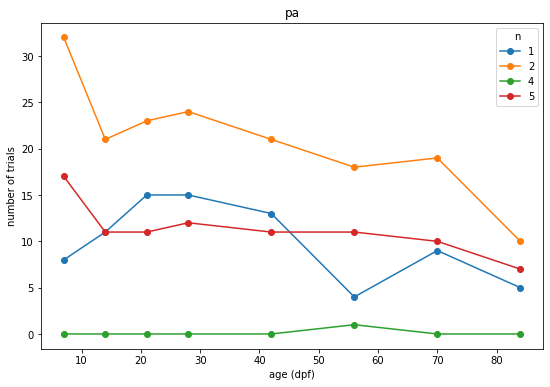

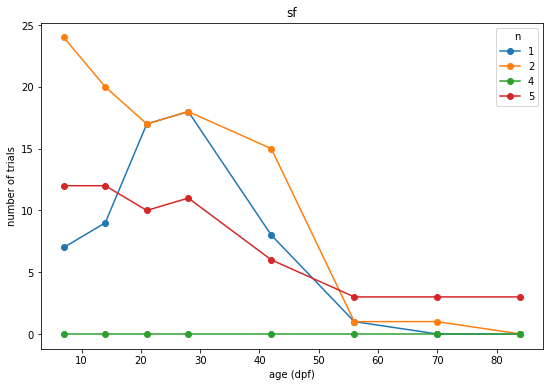

In [4]:
for pop in 'pa','sf':
    breakdown.loc[pop].plot(marker='o')
    plt.xlabel('age (dpf)')
    plt.ylabel('number of trials')
    plt.title(pop)